In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import pymc3 as pm

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


When we do linear regression, we combine a Gaussian likelihood with a formula for the mean $\mu$ that is linear in the coefficients of the features, or co-variates that go into the model. For an outcome variable $y$  far from any theoretical extremum, this is the maximum-enropy choice. Recall that among distribution sharing the same mean and variance, Gaussian distribution is the one that has maximum entropy (uncertainty)

But the Gaussian likelihood is a poor choice for constraints such as the outcome being counts, or being only positive.
We can do better: lets use all the information we have about the constraints on an outcome variable to choose a likelihood, typically in the exponential family, that is a maxent distribution.

# Basic Form

For example, suppose you own a monastery that is in the business, like many monasteries before the invention of the printing press, of copying manuscripts. You employ 1000 monks, and on any particular day about 1 of them finishes a manuscript. Since the monks are working independently of one another, and manuscripts vary in length, some days produce 3 or more manuscripts, and many days produce none. Since this is a binomial process, you can calculate the variance across days as np(1 − p) = 1000(0.001)(1 − 0.001) ≈ 1. You can simulate this, for example over 10,000 (1e5) days (McElreath 311-312)

In [2]:
from scipy.stats import binom
p=1/1000
rvs=binom.rvs(n=1000, p=1/1000, size=10000)

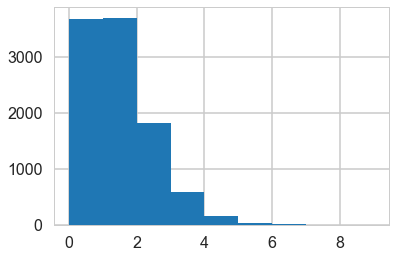

In [3]:
plt.hist(rvs, bins=np.arange(10));
